## **Prediction of Cancer**

Trying to predict weather the patient has malignant tumor or benign tumor

In [106]:
# For performing linear algebra
import numpy as np

# For processing data using data frames
import pandas as pd

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# getting the scikit-learn related packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

Loading Breast Cancer Wisconsin (Diagnostic) Data Set

In [85]:
df = pd.read_csv('/content/data.csv')

Exploring the data

In [86]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Dropping the columns with "Unnamed" and "id" since these won't be used in prediction

In [88]:
df=df.drop(['Unnamed: 32', 'id'], axis = 1)

In [89]:
print(df.shape)

(569, 31)


Write a python function to convert the diagnosis value of Malignant 1 and Benign 0

In [90]:
def diagnosis_value(diagnosis):
    if diagnosis == 'M':
        return 1
    else:
        return 0

df['diagnosis'] =df['diagnosis'].apply(diagnosis_value)

In [91]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Exploring the data with Seaborn

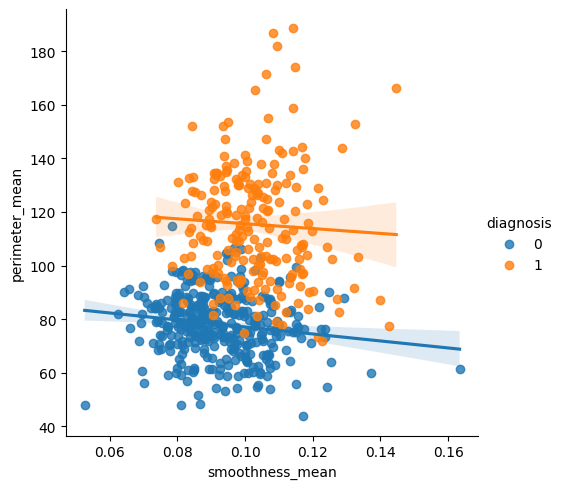

In [92]:
sns.lmplot(x = 'smoothness_mean', y = 'perimeter_mean', hue = 'diagnosis', data = df)

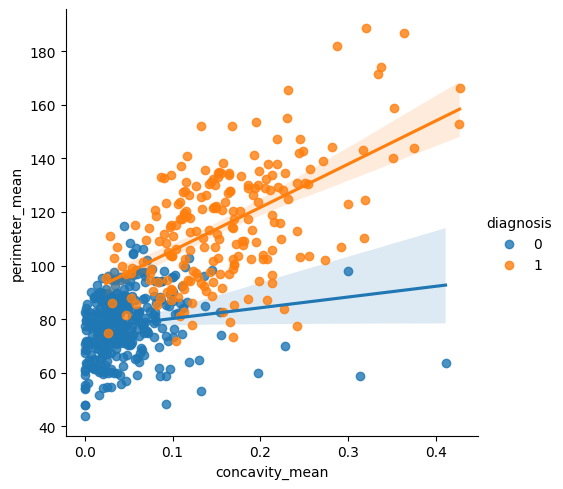

In [93]:
sns.lmplot(x = 'concavity_mean', y = 'perimeter_mean', hue = 'diagnosis', data = df)

Separate out predicted outcomes and data as X and Y

In [94]:
X = np.array(df.iloc[:, 1:])
y = np.array(df['diagnosis'])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 12, shuffle = True)

Defining the model we are going to use for prediction

In [96]:
knn = KNeighborsClassifier(n_neighbors = 10)

Fitting the model we defined on the training data we split earlier

In [97]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Predict a score

In [98]:
knn.score(X_test, y_test)

0.9005847953216374

Performing 10 fold cross validation

In [102]:
neighbors = []
cv_scores = []

# perform 10 fold cross validation
for k in range(1, 75, 1):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(
        knn, X_train, y_train, cv = 10, scoring = 'accuracy')
    cv_scores.append(scores.mean())


Plotting error as a function of number of neighbors

The optimal number of neighbors is  11 


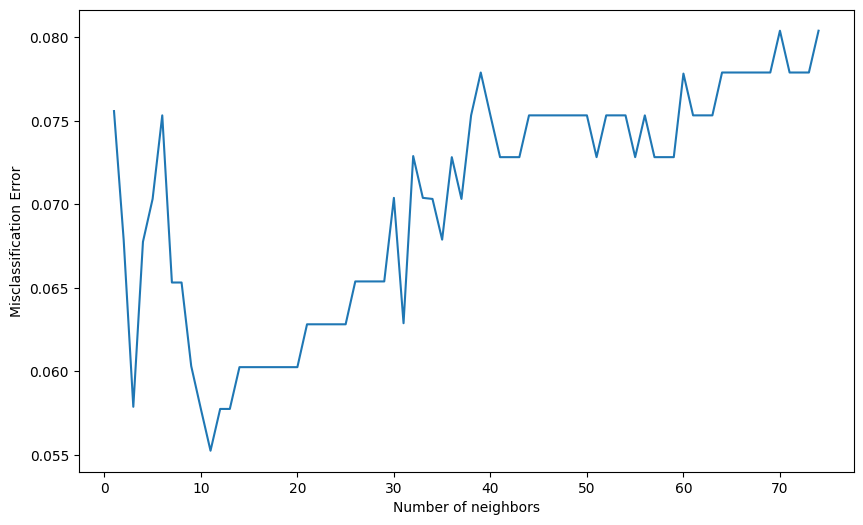

In [103]:
error = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[error.index(min(error))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, error)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()

## Using Logistic Regression for prediction

In [108]:
 min_max_scaler = MinMaxScaler()

Scaling the data appropriately using MinMaxScaler before using LogisticRegression

In [113]:
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.fit_transform(X_test)

In [ ]:
X

In [116]:
logreg = linear_model.LogisticRegression(random_state = 22, max_iter = 200)

In [117]:
logreg.fit(X_train_minmax, y_train)

LogisticRegression(max_iter=200, random_state=22)

In [119]:
logreg.score(X_test_minmax, y_test)

0.9473684210526315

Printing out the accuracy of the logistic regression model with 200 iterations

In [122]:
print("test accuracy: {} ".format(
    logreg.fit(X_train_minmax, y_train).score(X_test_minmax, y_test)))
print("train accuracy: {} ".format(
    logreg.fit(X_train_minmax, y_train).score(X_train_minmax, y_train)))

test accuracy: 0.9473684210526315 
train accuracy: 0.9673366834170855 


## Using RandomForest Classifier to determine how good it does

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rfc = RandomForestClassifier(n_estimators=15)
rfc.fit(X_train_minmax, y_train).score (X_test_minmax, y_test)

0.8830409356725146

Find optimum number of trees

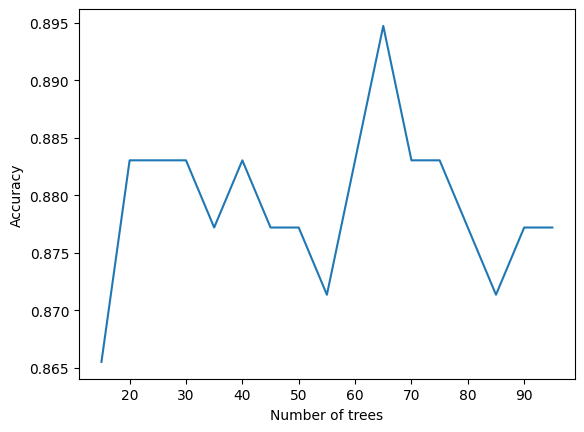

In [127]:
trees = []
accuracy = []

# perform 10 fold cross validation
for n in range(15, 100, 5):
    trees.append(n)
    rfc = RandomForestClassifier(n_estimators=n)
    score = rfc.fit(X_train_minmax, y_train).score(X_test_minmax, y_test)
    accuracy.append(score)
plt.plot(trees, accuracy)
plt.xlabel('Number of trees')
plt.ylabel('Accuracy')
plt.show()

In [132]:
optimum_trees = trees[accuracy.index(max(accuracy))]
print("Optimum Trees is:", optimum_trees)

Optimum Trees is: 65
